### Importing relevant libraries that we'll be making use of for this project.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob 
import matplotlib.pyplot as plt
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline


**Organizing our data into train,validation and test sets.This is achieved by moving subsets of the data into sub-directories for each separate data set.**

In [2]:
# Organizing data into train,valid test directories 
os.chdir('dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for i in random.sample(glob.glob('cat*'), 500):
        shutil.move(i,'train/cat')
    for i in random.sample(glob.glob('dog*'), 500):
        shutil.move(i,'train/dog')
    for i in random.sample(glob.glob('cat*'), 100):
        shutil.move(i,'valid/cat')
    for i in random.sample(glob.glob('dog*'), 100):
        shutil.move(i,'valid/dog')
    for i in random.sample(glob.glob('cat*'), 50):
        shutil.move(i,'test/cat')
    for i in random.sample(glob.glob('dog*'), 50):
        shutil.move(i,'test/dog')
        
os.chdir('../../')

### Processing the data.


In [3]:
train_path = 'cnn_data/dogs-vs-cats/train'
valid_path = 'cnn_data/dogs-vs-cats/valid'
test_path = 'cnn_data/dogs-vs-cats/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [4]:
imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

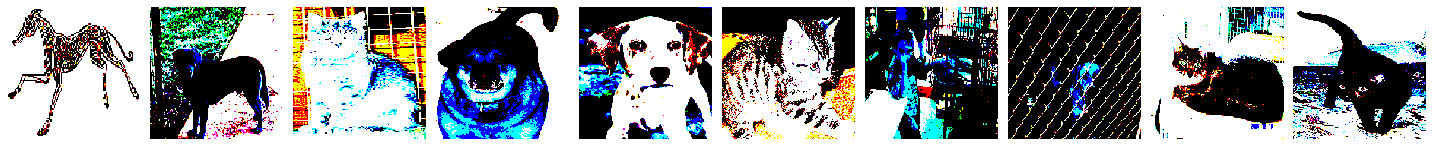

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [5]:
plotImages(imgs)
print(labels)

### Building and Training a Convolutional Neural Network

In this section, we'll try to build a simple convolutional neural network(CNN) and later train it on the images of dogs and cats using Tensorflow's Keras API

In [6]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2,2), strides=2),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2,2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax')
])

In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Traing a simple CNN
Now it's time to train the model using the `model.fit()` function. In this case we'll be using our `train_batches` and `valid_batches` to train and validate the model.

In [8]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=10,
    verbose=2
)

Train for 100 steps, validate for 20 steps
Epoch 1/10
100/100 - 90s - loss: 19.0278 - accuracy: 0.5410 - val_loss: 5.3210 - val_accuracy: 0.5600
Epoch 2/10
100/100 - 63s - loss: 2.0598 - accuracy: 0.7570 - val_loss: 2.6192 - val_accuracy: 0.6100
Epoch 3/10
100/100 - 49s - loss: 0.5545 - accuracy: 0.8670 - val_loss: 1.7901 - val_accuracy: 0.6750
Epoch 4/10
100/100 - 46s - loss: 0.1581 - accuracy: 0.9490 - val_loss: 1.8932 - val_accuracy: 0.5950
Epoch 5/10
100/100 - 49s - loss: 0.0399 - accuracy: 0.9820 - val_loss: 1.9892 - val_accuracy: 0.6150
Epoch 6/10
100/100 - 48s - loss: 0.0108 - accuracy: 0.9970 - val_loss: 1.9633 - val_accuracy: 0.6050
Epoch 7/10
100/100 - 49s - loss: 0.0023 - accuracy: 1.0000 - val_loss: 1.8361 - val_accuracy: 0.6350
Epoch 8/10
100/100 - 50s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.8273 - val_accuracy: 0.6100
Epoch 9/10
100/100 - 55s - loss: 6.7564e-04 - accuracy: 1.0000 - val_loss: 1.8421 - val_accuracy: 0.6200
Epoch 10/10
100/100 - 57s - loss: 5.7074e-0

#### Preparing the Test Data
Run `next(test_batches)` to extract a batch of images and their corresponding labels from the test set.
Recall that `test_batches` was created using Keras `ImageDataGenerator.flow_from_directory()` to generate batches of data from the set that resides on the disk.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

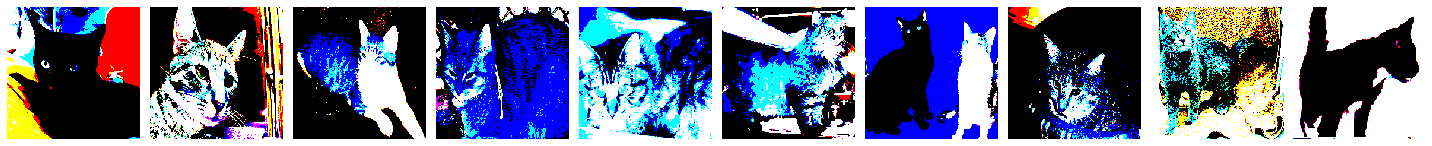

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
test_imgs, test_labels = next(test_batches)

#using `plotImage()` function we can see what this batch of data looks like.
plotImages(test_imgs)
print(test_labels)

#### Predicting on the Test Data

To have the model predict on the test_data set we call `model.predict()`

In [10]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

np.round(predictions)

#### Plotting Predictions with a Confusion Matrix
To the confusion matrix, we pas the true labels of the test set, along with the predicted labels for the test set from the model 

In [11]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

**Plotting the confusion matrix**

Confusion matrix, without normalization
[[36 14]
 [17 33]]


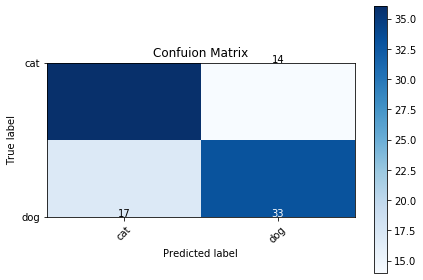

In [14]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title= 'Confuion Matrix')

#### Conclusion

From the results above we can see the model correctly predicted that an **image was a cat 40 times** when it was actually a cat, and **incorrectly predicted that an image was a cat 18 times** when it was not a cat. It correctly predicted that an **image was a dog 32 times**, and **incorrectly predicted that an image was a dog 10 times**.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

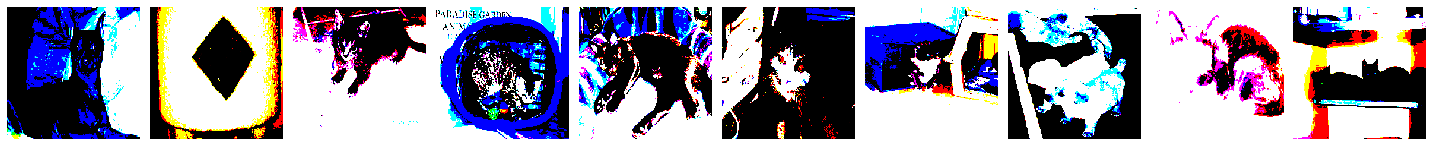

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [15]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

**Imported the VGG16 pretrained model from Keras.**

In [16]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 349s 1us/step


**Converting the Functional VGG16 model to a Sequential model so that we can work with it easly**

In [19]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)


Next, we'll iterate over each ofthe layers in our new sequential model and set them to be non-trainable. This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of cats ands dogs.
**We don't want re-training to occur on the earlier layers.**

In [ ]:
for layer in model.layers:
    layer.trainable = False
    
#Adding our new output layer, consisting of 2 nodes that correspond to cat and cat. This will be the only trainable layer.
